In [25]:
import Global_Functions as gf
import Data_Processing as dp
import pandas as pd
import numpy as np
import operator

from matplotlib import pyplot as plt

SAVE_FOLDER = "../Images/Comparison/"
gf.check_folder(SAVE_FOLDER)

Folder already exists.


In [3]:
# # experiments with 50-20 on 40-0-10
# results_theory = gf.open_CSV_file('../Images/Theoretical_Approach/2021-07-02_11-22/99_results.csv')
# results_rnn = gf.open_CSV_file('../Images/Data_Baseline/2021-07-03_11-03/99_results.csv')
# results_input = gf.open_CSV_file('../Images/Difference_add_scaled/2021-07-03_11-03/99_results.csv')
# results_output = gf.open_CSV_file('../Images/Difference_predict_scaled/2021-07-04_08-36/99_results.csv')
# results_loss = gf.open_CSV_file('../Images/Loss_function/Scaled/2021-07-08_10-40/99_results.csv')
# title = "50 for train - 20 for validation on (40, 0, 10)"

In [68]:
# # experiments on turbine data
# results_theory = gf.open_CSV_file('../Images/Turbines/Theoretical_Approach/2021-07-02_11-20/99_results.csv')
# results_rnn = gf.open_CSV_file('../Images/Turbines/Data_Baseline/2021-07-03_17-29/99_results.csv')
# results_input = gf.open_CSV_file('../Images/Turbines/Difference_add_scaled/2021-07-03_22-34/99_results.csv')
# results_output = gf.open_CSV_file('../Images/Turbines/Difference_predict_scaled/2021-07-03_22-34/99_results.csv')
# results_loss = gf.open_CSV_file('../Images/Turbines/Loss_function/2021-07-06_08-16/99_results.csv')
# title = "jump data of turbines"

In [69]:
def convert_results_to_np_array(results = None):
    data = [x[1:-1] for x in results['rmse']]
#     data.sort()
#     cut_point = int(len(data) * 0.05)
#     data = operator.itemgetter(0,1,3,4)(data)
    return np.array(data, dtype = 'float')

In [70]:
def convert_theory_results_to_np_array(results = None):
    data = [x for x in results['el_RMSE']]
#     data.sort()
#     cut_point = int(len(data) * 0.05)
#     data = operator.itemgetter(0,1,3,4)(data)
    return np.array(data, dtype = 'float')

In [71]:
def convert_loss_results_to_np_array(results = None):
    for i in range(len(results['tgds'])):
        data = results['rmse'][0][1:-1].split(", ")
#     data.sort()
#     cut_point = int(len(data) * 0.05)
#     data = operator.itemgetter(0,1,3,4)(data)
    return np.array(data, dtype = 'float')

In [72]:
theory = convert_theory_results_to_np_array(results_theory)
rnn = convert_results_to_np_array(results_rnn)
add = convert_results_to_np_array(results_input)
out = convert_results_to_np_array(results_output)
loss = convert_loss_results_to_np_array(results_loss)

In [73]:
np.mean(theory)

361.3487902678106

In [74]:
np.mean(rnn)

230.5855355338955

In [75]:
np.mean(add)

582.4614831656991

In [76]:
np.mean(out)

256.7634229409007

In [77]:
np.mean(loss)

217.25741409401687

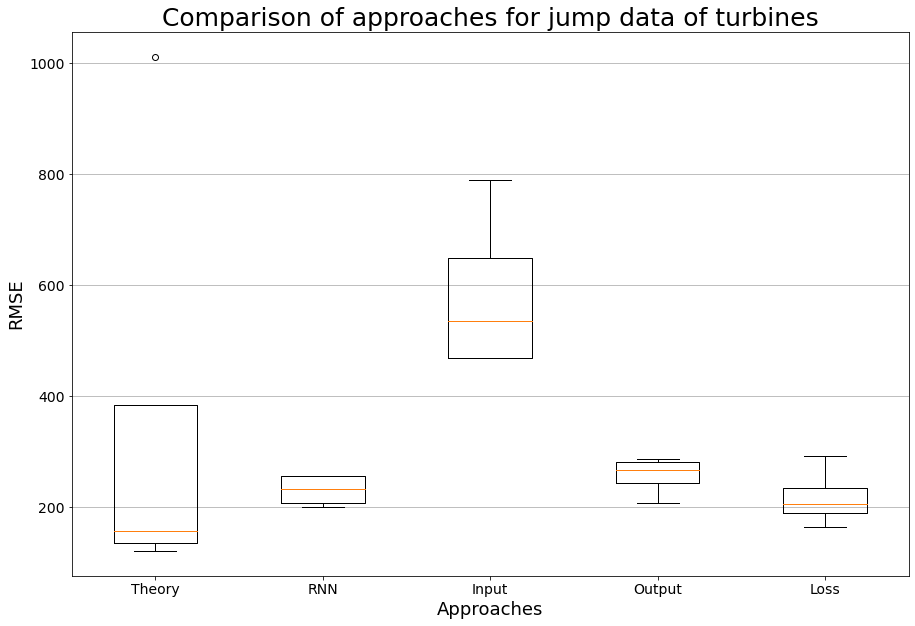

In [78]:
data = [theory, rnn, add, out, loss]
fig, ax = plt.subplots(figsize = (15,10))
ax.set_title('Comparison of approaches for ' + title, fontsize = 25)
ax.set_xlabel('Approaches', fontsize = 18)
ax.set_ylabel('RMSE', fontsize = 18)
ax.yaxis.grid(True)
# plt.ylim([0, 300])
plt.boxplot(data, labels = ['Theory', 'RNN', 'Input', 'Output', 'Loss'], )
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

fig.savefig(SAVE_FOLDER + title + 'jumps.png')